In [2]:
import numpy as np # import numpy library and rename it to np. Access functions in it with a period. For example, np.mean(x) computes the mean of the array x.
import matplotlib.pyplot as plt # import plotting library and rename it plt

1. (1 point) Load the file spike_times_2022.npy (for this file type, use np.load) and place its contents into a numpy array called spike_time_array. 

    This holds data from a simulated experiment where we recorded from a neuron over 50 trials of 5s each. The first rows range over spikes. The first column holds the spike times (measured from the beginning of each trial, in milliseconds) and the second column holds the trial number. During each trial, the neuron was stimulated at a random time within a certain window.

    What is the total number of spikes in the experiment? (Print your answer.)

In [3]:
spike_time_array = np.load('spike_times_2022.npy')
total_spikes = np.shape(spike_time_array)[0]
print("There are", total_spikes, "of spikes in the experiment." )

There are 95045 of spikes in the experiment.


2. (1 point) Create a function that transforms this list of spike times and trial labels to a binary representation of these spikes: a 2-dimensional array with rows for time intervals in each trial and a column for each trial. The [i, j] of this array will hold the number of spikes recorded in time interval i on trial j. Use a default time bin of 1 ms.

In [14]:
def binarize_spike_times(spike_time_array, dt=0, trial_len=5000): # starts at 0ms, not 1ms
    
    num_trials = 50
    
    # create a 50 X 5001 array, so that first column would be 0ms and the last column would be 5000ms
    # this is a trials by time intervals array
    spike_array = np.zeros((num_trials, trial_len+1)) 
    
    # calculate the total number of spikes at each time interval 
    spike_counts = np.zeros((trial_len+1,))
    
    for i in range(num_trials):
        trial_i_ind = np.where(spike_time_array[:,1] == i)[0]
        trial_i_spike_times = spike_time_array[trial_i_ind,0]
        
        # sort the spike times of each trial and round them to integers 
        int_trial_i_spike_times = np.round(np.sort(trial_i_spike_times)).astype(int)
        
        for j in int_trial_i_spike_times:
            spike_array[i, j] += 1
            spike_counts[j] += 1
    
    # transpose the array to time intervals by trials (5001 x 50) as the question requires 
    spike_array = spike_array.T
    return spike_array, spike_counts

# call the function and assign it to arr 
# assign arr[0] to spike_array and arr[1] to spike_counts 
arr = binarize_spike_times(spike_time_array)
spike_array = arr[0]
spike_counts = arr[1]

# spike_array[i, j]: i is the time interval from 0ms to 5000ms; j is the trial index from 0 to 49
# the below print statements are for test purpose 
print(spike_array[3,49])
print(spike_counts)

0.0
[ 5.  5.  4. ... 27. 21. 17.]


3. (1 point) Make two figures. In the first, make a raster plot of the spike train. In the second, plot the PSTH in units of spikes/millisecond (kilohertz). Label the axes of both. For both, the x axis should have units of milliseconds and stop at 5000.

In [5]:
# a helper method for raster plot(b) I mentioned in the next cell
spike_times_trial_by_time = []
for i in range(50):
    trial_i_ind = np.where(spike_time_array[:, 1] == i)[0]
    trial_i_spike_times = spike_time_array[trial_i_ind,0]
    spike_times_trial_by_time.append(trial_i_spike_times)

Text(0.5, 1.0, 'PSTH Plot')

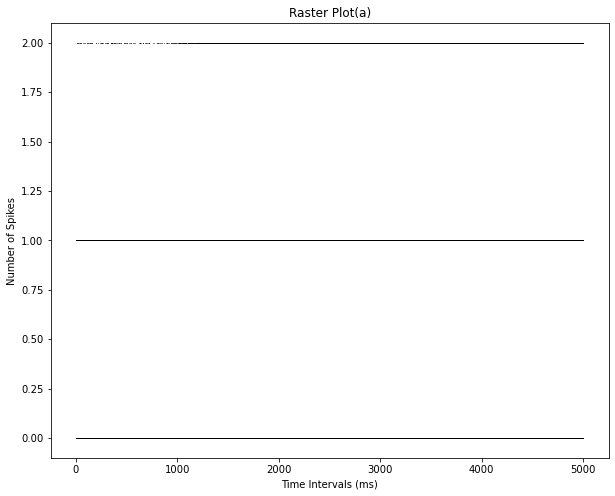

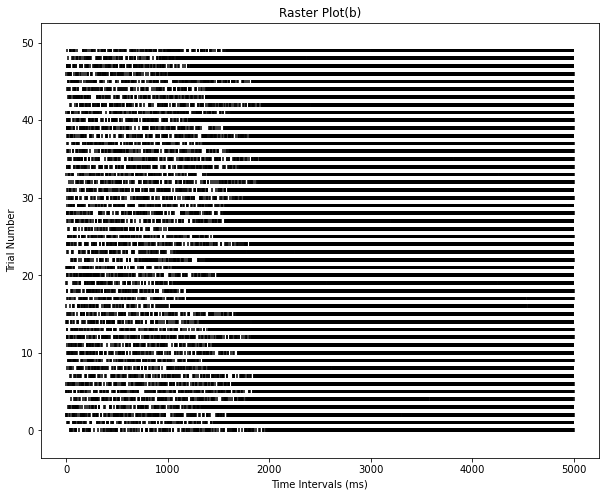

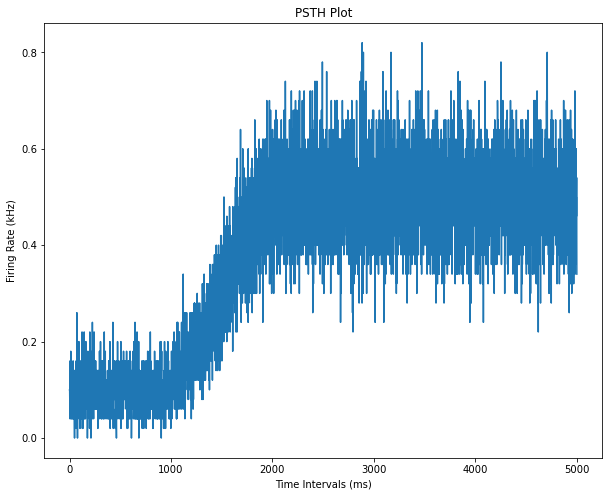

In [6]:
# I created two raster plots: (a) a plot of the number of spikes as y-axis and the time intervals as x-axis (b) a plot
# of trial number as y-axis and the time intervals as x-axis

#raster plot(a)
plt.figure(figsize=(10,8))
plt.plot(spike_array, "k|", markersize = .5)
plt.xlabel("Time Intervals (ms)")
plt.ylabel("Number of Spikes")
plt.title("Raster Plot(a)")

#raster plot(b)
plt.figure(figsize=(10,8))
plt.eventplot(spike_times_trial_by_time, "horizontal", color=[0,0,0], linelength = 0.5)
plt.xlabel("Time Intervals (ms)")
plt.ylabel("Trial Number")
plt.title("Raster Plot(b)")


### I plotted the PSTH two ways - they only need to do one.

# spike_counts outputs the total number of spikes on each time interval
psth = spike_counts / 50  # spikes / ms, average over trials 
plt.figure(figsize=(10,8))
plt.plot(np.arange(0,5001,1), psth)
plt.xlabel("Time Intervals (ms)")
plt.ylabel("Firing Rate (kHz)")
plt.title("PSTH Plot")

4. (1 point) What was the time window that contained the stimulus? Give as restricted an answer as possible. For example, the window (0 seconds, 5 seconds) is the whole trial length; it definitely contains the stimulus, but is incorrect.

In [7]:
time_window = []
for i in range(50):
    trial_i_ind = np.where(spike_time_array[:, 1] == i)[0]
    trial_i_spike_times = np.sort(spike_time_array[trial_i_ind,0])
    time_window.append([trial_i_spike_times[0], trial_i_spike_times[-1]])

# time_window[i] (i is the trial index) outputs [a,b] where a is the start of the time window while b is the end 
print("This is an testing example: On trial 49", "the time window starts at", \
      time_window[49][0], "ms", "and ends at", time_window[49][1], "ms")

This is an testing example: On trial 49 the time window starts at 4.66 ms and ends at 4998.75 ms


5. (1 point) Compute the average firing rate (in spikes per second) for each trial. What is the standard deviation, across trials, of this average firing rate?

In [8]:
# sum the spikes in every trial
total_spikes_each_trial = np.sum(spike_array, axis=0)
firing_rate = total_spikes_each_trial / 5 # spikes per second
print("The standard diviation across trials is", np.std(firing_rate))

The standard diviation across trials is 22.582373657346118


6. (1 point) Compute the standard deviation of the spike train across trials, as a function of time, and plot it. (As usual, label your axes.) How does the trial-to-trial variability of the activity change when the stimulus is presented?

The trial-to-trial variability increases as the time goes by.


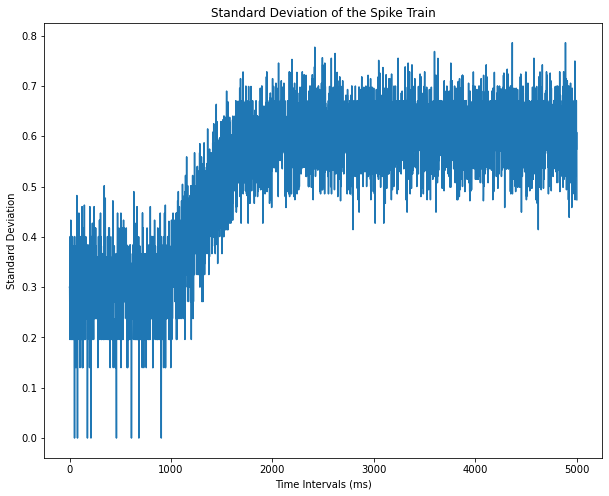

In [9]:
std = np.std(spike_array.T, axis=0)

plt.figure(figsize=(10,8))
plt.plot(np.arange(0,5001,1), std)
plt.xlabel("Time Intervals (ms)")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of the Spike Train")

print("The trial-to-trial variability increases as the time goes by.")

7. (1 point) Write a function that takes in an array like spike_time_array and returns an array with interspike intervals (ISIs) in the first dimension and trial numbers in the second dimension. For each spike after the first in a trial, its ISI is the spike time minus the time of the previous spike. The first spike in a trial has no ISI of its own.

In [10]:
def compute_isi_array(spike_time_array):
    
    '''
    input: spike_time_array, with a row for each spike. column 0 holds spike times, column 1 holds trial numbers.
    output: isi_array, an array with the same structure as spike_time_array but holding ISIs
    '''
    
    Nspikes = np.shape(spike_time_array)[0] # how many spikes are there in spike time array? (compute it, don't hardcode a number)
    #np.amax(spike_time_array[:,1]) + 1
    Ntrials = (spike_time_array[:,1][-1] + 1).astype(int) # how many trials are there in spike time array? (compute it, don't hardcode a number)

    Nisi = Nspikes - Ntrials  # how many total ISIs are there?
    
    isi_array = np.zeros((Nisi, 2))

    n_isi = 0 # to count which ISI (out of the total number) we're at on each iteration of the loop
    
    for n in range(Ntrials):
        
        trial_ind = np.where(spike_time_array[:,1] == n)[0]  # which elements of spike_time_array occur on trial n?
        this_trial = spike_time_array[trial_ind, 0] # get the spike times from trial n
    
        this_trial_isi = np.diff(np.sort(this_trial))
        n_this_trial_isi = np.shape(this_trial_isi)[0] # how many ISIs occur on trial n?
        
        for i in range(n_this_trial_isi): 
        # fill in the ISI array
            isi_array[i + n_isi, 0] = this_trial_isi[i]
            isi_array[i + n_isi, 1] = n
        
        n_isi += n_this_trial_isi
    
    return isi_array

# call the function and store it as the variable isi 
isi = compute_isi_array(spike_time_array)
print(isi)

[[ 2.12  0.  ]
 [11.47  0.  ]
 [ 0.67  0.  ]
 ...
 [ 1.08 49.  ]
 [ 0.49 49.  ]
 [ 3.28 49.  ]]


8. (1 point) Using that function, compute the ISIs and put them in a new variable. How many ISIs are there in this experiment? How does that compare to the number of spikes? What is the reason for this difference?

In [11]:
num_isi = np.shape(isi)[0]
print("There are", num_isi, "ISIs in total.")
print('The total number of ISIs is 50 less than that of the spikes in this experiemnt because there are fifty trials in     total and the first spike does not have an ISI of its own.')

There are 94995 ISIs in total.
The total number of ISIs is 50 less than that of the spikes in this experiemnt because there are fifty trials in     total and the first spike does not have an ISI of its own.


10. (1 point) What is the third ISI of trial 10?

In [12]:
trial_10_ind = np.where(isi[:,1] == 10)[0]
trial_10 = isi[trial_10_ind,0]
print("The third ISI of trial 10 is", trial_10[2])

The third ISI of trial 10 is 2.3200000000000003


9. (1 point) Plot the ISI histogram with bins of 1 ms. Label the axes and describe the plot.

This is a histogram that records the number of ISIs on each ISI interval.


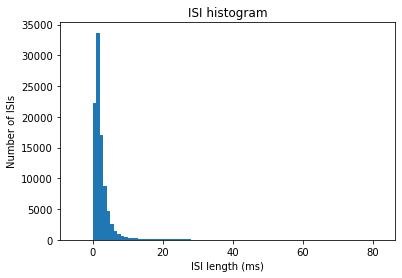

In [13]:
plt.figure()
plt.hist(isi[:,0], bins = np.arange(-5, np.amax(isi[:,0])+1, 1))
plt.xlabel("ISI length (ms)")
plt.ylabel("Number of ISIs")
plt.title("ISI histogram")

print("This is a histogram that records the number of ISIs on each ISI interval.")